20210130l_m2km.fits

collecting data
 - time: 2.2253
 - data shape: 6000x246x329
collecting bias
 - time: 0.3534
 - bias image shape: 246x329
data reduction
 - time: 4.2973
 - pupil image shape: 226x226
cross correlating
 - time: 0.2110
 - cross-corr image shape: 452x452
creating auto-corr pupil image
 - time: 0.0534
 - auto-corr pupil image shape: 452x452
creating gammas
delta: 0.0055309734513274336
 - time: 42.2149
 - 50 polychromatic turbulence layers from 0 to 50 km
calculating threshold
 - time: 0.2817
 - threshold: 0.0021158887584387586
finding peaks
 - time: 0.0108
 - 5 peaks found

Initial guess for the parameters:
[[  0.          0.                inf   2.       ]
 [ -4.977876   -2.2123895         inf  10.       ]
 [ -6.0840707  -5.8075223         inf  10.       ]
 [-11.061947  -10.508849          inf  10.       ]
 [-15.763274  -15.486726          inf  10.       ]]
 - total Cn2: inf
 - seeing, 650 nm: inf


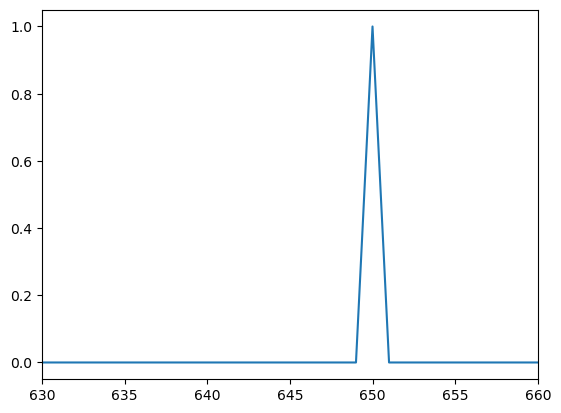

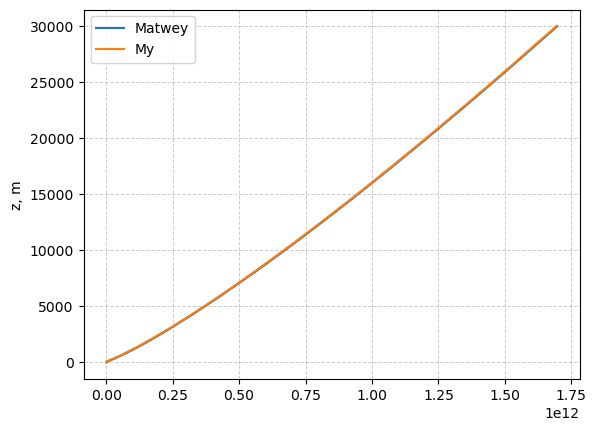

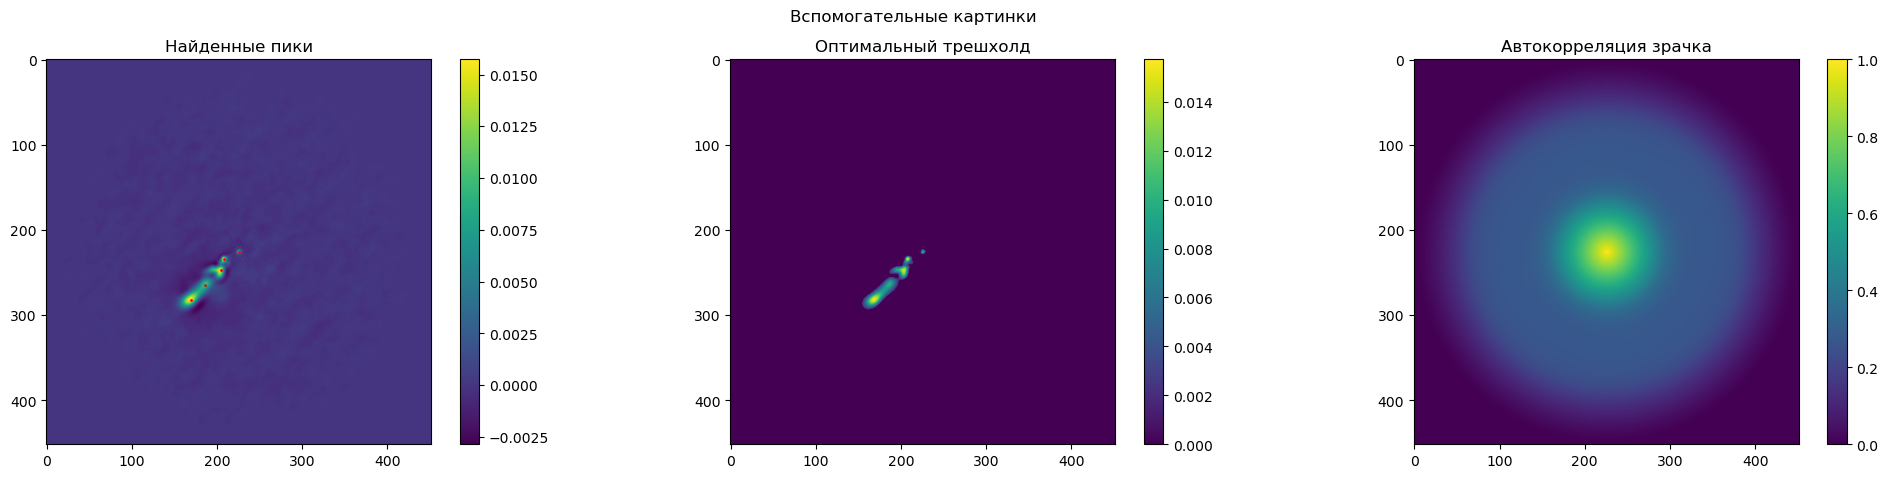

In [1]:
from main import processDomecam

file = '20210130l_m2km.fits'
file_bias = 'bias20210130.fits'
data_dir = 'D:/astro/domecam'

'''
можно ли заранее при создании гамм учесть домножение cjk? чтобы каждый раз не домножать внутри аппроксимации
Ихображение кросс-корреляции можно поделить на cjk, чтобы в аппроксимации его не учитывать, так можно? (вроде у Матвея так было)
-да, можно, однозначно стоит попробовать
'''
latency = [4] # задержка для кросс-корреляции, [кадр]
conjugated_distance = 2 # сопряженное расстояние, [километр]
D = 2.5 # диаметр телескопа, [метр]
spectrum = 'poly' # тип излучения

# для монохроматического излучения, нужно указать длину волны света
lambda_ = 650*1e-9 # длина наблюдаемой волны света, [метр]

# для полихроматического излучения нужны кривые фильтра, детектора и звезды
file_filter = 'KC19_d16t4_Safonov.xls'
file_ccd = 'ccd_prosilica2.crv'
file_star = 'a05.sp'

processDomecam(file=file, file_bias=file_bias, data_dir=data_dir, 
               D=D, conjugated_distance=conjugated_distance, latency=latency,
               spectrum=spectrum, lambda_=lambda_, file_filter=file_filter, file_ccd=file_ccd, file_star=file_star)

In [2]:
# '''
# сделать ли распределение по высотам у теор. гамм одинаковым для всех реализаций или сделать его настраиваемым?
# ну и как лучше сделать это распределение -  если геом.спейс то как задать само распределение и крайневые значения 
# '''

# import numpy as np
# import matplotlib.pyplot as plt

# num_of_layers=50
# a1 = np.linspace(0, 50000, num_of_layers)
# a2 = np.geomspace(1, 50000, num_of_layers)

# plt.figure()
# plt.plot(a1, label='linspace')
# plt.plot(a2, label='geomspace')
# plt.legend()
# plt.grid(color='grey', linestyle='--', linewidth=0.7, alpha=0.4)